In [1]:
!pip install yfinance

import yfinance as yf
import pandas as pd

# Download Bitcoin data (BTC-USD) from 1 January 2024 to 31 December 2024
ticker = "BTC-USD"
start_date = "2024-01-01"
end_date = "2024-12-31"

data = yf.download(ticker, start=start_date, end=end_date)

# Select only the 'Close' price
price_data = data['Close']

# Display the first few rows of the data
display(price_data.head())

/tmp/ipython-input-351421512.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Ticker,BTC-USD
Date,
2024-01-01,44167.332031
2024-01-02,44957.968750
2024-01-03,42848.175781
2024-01-04,44179.921875
2024-01-05,44162.691406


In [2]:
display(price_data)

Ticker,BTC-USD
Date,
2024-01-01,44167.332031
2024-01-02,44957.968750
2024-01-03,42848.175781
2024-01-04,44179.921875
2024-01-05,44162.691406
...,...
2024-12-26,95795.515625
2024-12-27,94164.859375
2024-12-28,95163.929688


In [ ]:
 generate predict the btc-usd price using random forest


In [ ]:
predict the btc-usd price using random forest

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=price_data)

In [3]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=price_data)

KeyboardInterrupt: 

# Task
Analyze and predict the price of BTC-USD from 1 January 2024 to 31 December 2024 using a Random Forest model.

## Feature engineering

### Subtask:
Create relevant features from the time series data (e.g., lagged prices, moving averages).


**Reasoning**:
Create lagged features and moving averages from the 'Close' price and handle missing values by dropping rows with NaNs.



In [4]:
df_featured = price_data.copy()

# Create lagged features
for i in range(1, 8):
    df_featured[f'Close_lag{i}'] = df_featured['BTC-USD'].shift(i)

# Calculate rolling moving averages
df_featured['Close_MA7'] = df_featured['BTC-USD'].rolling(window=7).mean()
df_featured['Close_MA30'] = df_featured['BTC-USD'].rolling(window=30).mean()

# Drop rows with NaN values
df_featured.dropna(inplace=True)

# Display the first few rows of the featured data
display(df_featured.head())

Ticker,BTC-USD,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Close_lag6,Close_lag7,Close_MA7,Close_MA30
Date,,,,,,,,,,
2024-01-30,42952.609375,43288.246094,42035.593750,42120.054688,41816.871094,39933.808594,40077.074219,39845.550781,41746.322545,42930.845964
2024-01-31,42582.605469,42952.609375,43288.246094,42035.593750,42120.054688,41816.871094,39933.808594,40077.074219,42104.255580,42878.021745
2024-02-01,43075.773438,42582.605469,42952.609375,43288.246094,42035.593750,42120.054688,41816.871094,39933.808594,42553.107701,42815.281901
2024-02-02,43185.859375,43075.773438,42582.605469,42952.609375,43288.246094,42035.593750,42120.054688,41816.871094,42748.677455,42826.538021
2024-02-03,42992.250000,43185.859375,43075.773438,42582.605469,42952.609375,43288.246094,42035.593750,42120.054688,42873.276786,42786.948958


## Visualization

### Subtask:
Visualize the predicted prices against the actual prices.

**Reasoning**:
Plot the actual BTC-USD prices from the test set against the predicted prices to visually assess the model's performance.

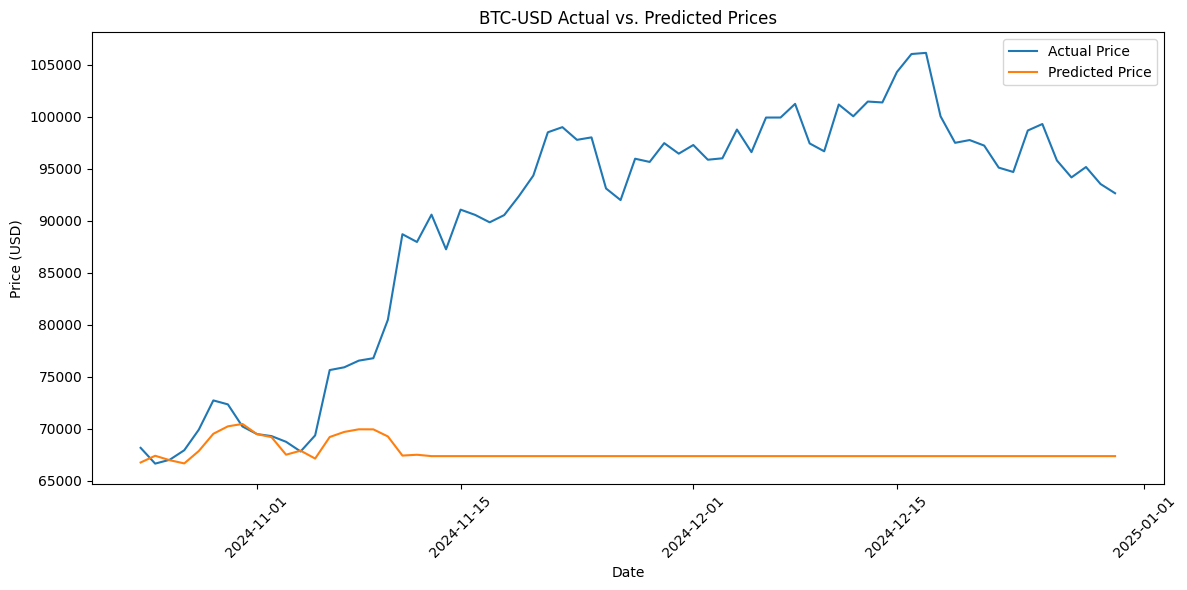

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.title('BTC-USD Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Define features X and target y, then split the data into training and testing sets using train_test_split with a test size of 20% and no shuffling.



In [5]:
X = df_featured.drop('BTC-USD', axis=1)
y = df_featured['BTC-USD']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

Ticker,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Close_lag6,Close_lag7,Close_MA7,Close_MA30
Date,,,,,,,,,
2024-01-30,43288.246094,42035.593750,42120.054688,41816.871094,39933.808594,40077.074219,39845.550781,41746.322545,42930.845964
2024-01-31,42952.609375,43288.246094,42035.593750,42120.054688,41816.871094,39933.808594,40077.074219,42104.255580,42878.021745
2024-02-01,42582.605469,42952.609375,43288.246094,42035.593750,42120.054688,41816.871094,39933.808594,42553.107701,42815.281901
2024-02-02,43075.773438,42582.605469,42952.609375,43288.246094,42035.593750,42120.054688,41816.871094,42748.677455,42826.538021
2024-02-03,43185.859375,43075.773438,42582.605469,42952.609375,43288.246094,42035.593750,42120.054688,42873.276786,42786.948958


Ticker,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Close_lag6,Close_lag7,Close_MA7,Close_MA30
Date,,,,,,,,,
2024-10-24,66432.195312,67361.406250,67367.851562,69001.703125,68362.734375,68418.789062,67399.835938,67872.247768,64503.103255
2024-10-25,68161.054688,66432.195312,67361.406250,67367.851562,69001.703125,68362.734375,68418.789062,67618.479911,64619.745573
2024-10-26,66642.414062,68161.054688,66432.195312,67361.406250,67367.851562,69001.703125,68362.734375,67425.902902,64680.868099
2024-10-27,67014.695312,66642.414062,68161.054688,66432.195312,67361.406250,67367.851562,69001.703125,67272.702009,64752.155859
2024-10-28,67929.296875,67014.695312,66642.414062,68161.054688,66432.195312,67361.406250,67367.851562,67635.545759,64886.159505


,BTC-USD
Date,
2024-01-30,42952.609375
2024-01-31,42582.605469
2024-02-01,43075.773438
2024-02-02,43185.859375
2024-02-03,42992.250000


,BTC-USD
Date,
2024-10-24,68161.054688
2024-10-25,66642.414062
2024-10-26,67014.695312
2024-10-27,67929.296875
2024-10-28,69907.757812


## Model training

### Subtask:
Train a Random Forest Regressor model on the training data.


**Reasoning**:
Import the RandomForestRegressor and train the model on the training data.



In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## Prediction

### Subtask:
Make predictions on the testing data.


**Reasoning**:
Make predictions on the test data using the trained Random Forest Regressor model.



In [7]:
y_pred = model.predict(X_test)
display(y_pred)

array([66751.468125  , 67398.40929688, 66972.35816406, 66663.43175781,
       67855.30882812, 69511.55367187, 70227.58210937, 70458.1925    ,
       69476.4328125 , 69188.29925781, 67501.49558594, 67887.52839844,
       67129.03648437, 69200.66402344, 69690.69644531, 69942.67671875,
       69937.88496094, 69255.96246094, 67416.596875  , 67496.41710938,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
       67364.50023437, 67364.50023437, 67364.50023437, 67364.50023437,
      

## Evaluation

### Subtask:
Evaluate the model's performance using appropriate metrics.


**Reasoning**:
Calculate and print the MSE and R-squared to evaluate the model's performance.



In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 637063870.7266725
R-squared (R2): -3.5799375133339115


## Summary:

### Data Analysis Key Findings

*   Lagged features for the 'BTC-USD' closing price (up to 7 days) and moving averages (7-day and 30-day) were successfully created as input features for the model.
*   The data was split into training (80%) and testing (20%) sets without shuffling to maintain the time series order.
*   A Random Forest Regressor model was trained on the training data.
*   Predictions were made on the testing data using the trained model.
*   The model performance was evaluated using Mean Squared Error (MSE) and R-squared (R2).
*   The Mean Squared Error (MSE) was approximately 637,063,870.73, indicating a large error in predictions.
*   The R-squared (R2) score was approximately -3.58, suggesting that the model performs worse than a simple horizontal line at the mean of the test data.

### Insights or Next Steps

*   The current Random Forest model with the selected features performs very poorly in predicting BTC-USD prices for the test period, as indicated by the high MSE and negative R2 score.
*   Future steps should involve exploring alternative features (e.g., volume, technical indicators, external factors), trying different time series models (like ARIMA, LSTM), or hyperparameter tuning the Random Forest model to improve performance.
